# Rotor Estimation

In [293]:
import sys
sys.path.append('../build/Debug/')

from transformations import (quaternion_matrix as quaternion_to_matrix,
                             euler_matrix, 
                             euler_from_quaternion)
import librotor_estimation as rotor_estimation

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
points_a = np.array([-0.1022, -0.8637, 0.0,
                     -0.2414,  0.0774, 0.0, 
                      0.3192, -1.2141, 0.0,
                      0.3129, -1.1135, 0.0, 
                     -0.8649, -0.0068, 0.0,
                     -0.0301,  1.5326, 0.0,
                     -0.1649, -0.7697, 0.0, 
                      0.6277,  0.3714, 0.0,  
                      1.0933, -0.2256, 0.0, 
                      1.1093,  1.1174, 0.0]).reshape(10,3)

In [4]:
points_b = np.array([-0.7991, -0.3433, 0.0,
                     -0.0537,  0.2478, 0.0,
                     -0.8919, -0.8835, 0.0,
                     -0.8079, -0.8277, 0.0,
                     -0.4384,  0.7456, 0.0,
                      1.3123,  0.7923, 0.0,  
                     -0.7490, -0.2420, 0.0,
                      0.6355, -0.3579, 0.0,
                      0.3513, -1.0596, 0.0,
                      1.5223, -0.4020, 0.0]).reshape(10,3)

In [88]:
rotor_parameters = np.array([1.0, 0.0, 0.0, 0.0]).reshape(4,1)
re = rotor_estimation.RotorEstimation()
rotor_1 = re.run(rotor_parameters, points_a, points_b)
rotor_1

array([[ 0.86602017],
       [ 0.50000906],
       [ 0.        ],
       [ 0.        ]])

In [89]:
bivector_parameters = np.array([0.1, 0.0, 0.0]).reshape(3,1)
rbe = rotor_estimation.RotorBivectorGeneratorEstimation()
rotor_2 = rbe.run(bivector_parameters, points_a, points_b)
rotor_2

array([[  8.66020170e-01],
       [  5.00009064e-01],
       [  9.44013967e-24],
       [ -1.18384608e-22]])

In [90]:
def plot_gradient_max_norm(iterations):
    plt.plot([iteration['gradient_max_norm'] for iteration in iterations])
    plt.xticks([iteration['iteration'] for iteration in iterations])
    plt.xlabel('iteration')
    plt.ylabel('gradient max norm')
    plt.show()

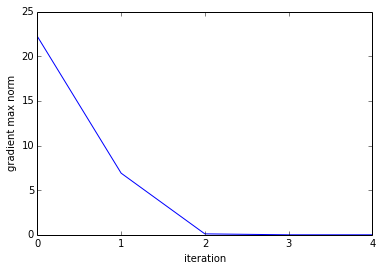

In [91]:
plot_gradient_max_norm(rbe.summary()['iterations'])

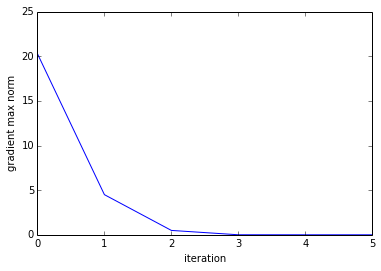

In [92]:
plot_gradient_max_norm(re.summary()['iterations'])

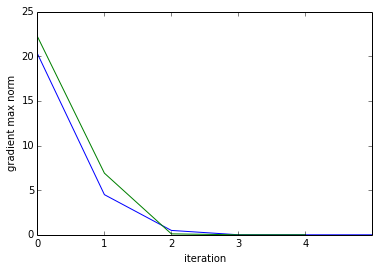

In [93]:
iterations = re.summary()['iterations']
plt.plot([iteration['gradient_max_norm'] for iteration in iterations])
iterations = rbe.summary()['iterations']
plt.plot([iteration['gradient_max_norm'] for iteration in iterations])
plt.xticks([iteration['iteration'] for iteration in iterations])
plt.xlabel('iteration')
plt.ylabel('gradient max norm')
plt.show()

In [166]:
from mpl_toolkits.mplot3d import Axes3D
def plot_point_clouds(points_a, points_b):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    x = points_a[:,0]
    y = points_a[:,1]
    z = points_a[:,2]
    ax.scatter(x, y, z, c = 'red')
    x = points_b[:,0]
    y = points_b[:,1]
    z = points_b[:,2]
    ax.scatter(x, y, z)
    ax.set_xlabel('$x$-axis')
    ax.set_ylabel('$y$-axis')
    ax.set_zlabel('$z$-axis')

In [338]:
r = euler_matrix(0.0,0.0,-np.pi/3.0)[:3,:3]
r

array([[ 0.5      ,  0.8660254,  0.       ],
       [-0.8660254,  0.5      , -0.       ],
       [-0.       ,  0.       ,  1.       ]])

In [370]:
n_points = 1000
sigma = 0.1
points_a = np.random.rand(n_points,3)
points_b = np.array([np.dot(r,point.reshape(3,1)).reshape(3) for point in points_a])
points_b_noisy = points_b + sigma * np.random.randn(n_points,3)

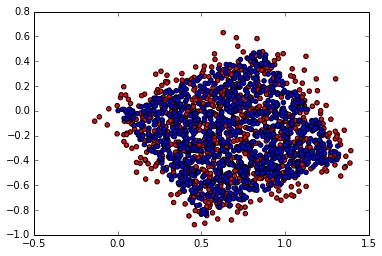

In [371]:
fig = plt.figure()
plt.scatter(points_b_noisy[:,0], points_b_noisy[:,1],c='r')
plt.scatter(points_b[:,0], points_b[:,1])
plt.show()

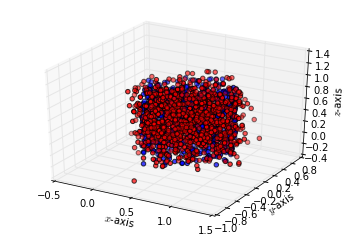

In [372]:
plot_point_clouds(points_b_noisy, points_b)

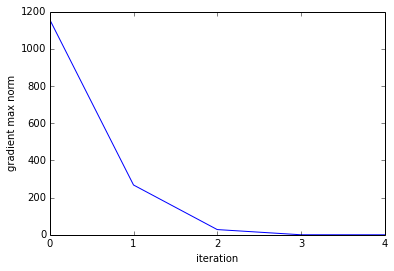

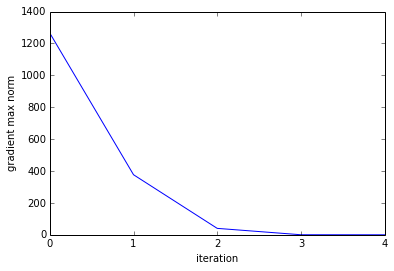

In [373]:
rotor_parameters = np.array([1.0, 0.0, 0.0, 0.0]).reshape(4,1)
re = rotor_estimation.RotorEstimation()
rotor_1 = re.run(rotor_parameters, points_a, points_b_noisy)
plot_gradient_max_norm(re.summary()['iterations'])

bivector_parameters = np.array([0.1, 0.0, 0.0]).reshape(3,1)
rbe = rotor_estimation.RotorBivectorGeneratorEstimation()
rotor_2 = rbe.run(bivector_parameters, points_a, points_b_noisy)
plot_gradient_max_norm(rbe.summary()['iterations'])

In [374]:
def rotor_to_quaternion(rotor):
    rotor = rotor.ravel()
    return np.array([-rotor[3], rotor[2], -rotor[1],rotor[0]])

In [375]:
r = quaternion_to_matrix(rotor_to_quaternion(rotor_1))[:3,:3]
r

array([[ 0.50456296,  0.8633696 , -0.00302586],
       [-0.86330563,  0.50447499, -0.0144352 ],
       [-0.01093644,  0.00989571,  0.99989123]])

In [376]:
points_b_estimated = np.array([np.dot(r,point.reshape(3,1)).reshape(3) for point in points_a])

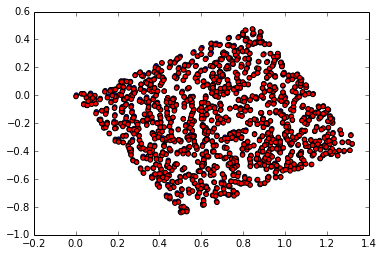

In [377]:
fig = plt.figure()
plt.scatter(points_b[:,0], points_b[:,1])
plt.scatter(points_b_estimated[:,0], points_b_estimated[:,1],c='r')
plt.show()

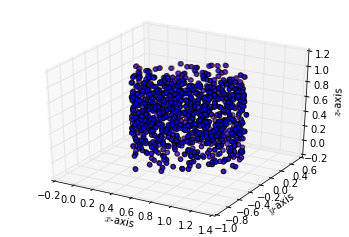

In [378]:
plot_point_clouds(points_b, points_b_estimated)